<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Extrema-unter-Nebenbedingungen" data-toc-modified-id="Extrema-unter-Nebenbedingungen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Extrema unter Nebenbedingungen</a></span></li></ul></div>

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()
%matplotlib notebook
x,y,z,mu = symbols('x y z mu')

## Extrema unter Nebenbedingungen

In [2]:
g = x**4+y**4-1
gn = lambdify((x,y),g)
gn(1,2)

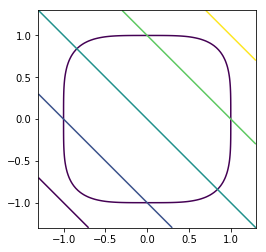

In [3]:
g = x**4+y**4-1
f = x+y
gn = lambdify((x,y),g)
fn = lambdify((x,y),f)
xv,yv = np.linspace(-1.3,1.3,100),np.linspace(-1.3,1.3,100)
X,Y = np.meshgrid(xv,yv)
fig = plt.figure()
ax = fig.gca()
pg = ax.contour(X,Y,gn(X,Y),0)
ax.contour(X,Y,fn(X,Y),[-2,-1,0,1,2])
ax.set_aspect('equal')

In [4]:
grad_g = Matrix(2,1,(g.diff(x),g.diff(y)))
grad_f = Matrix(2,1,(f.diff(x),f.diff(y)))

In [5]:
grad_gn = lambdify((x,y),grad_g)
grad_fn = lambdify((x,y),grad_f)

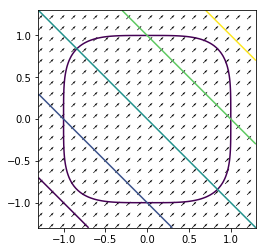

In [6]:
fig = plt.figure()
ax = fig.gca()
pg = ax.contour(X,Y,gn(X,Y),0)
ax.contour(X,Y,fn(X,Y),[-2,-1,0,1,2])
GF = grad_fn(X[::5,::5],Y[::5,::5])
ax.quiver(X[::5,::5],Y[::5,::5],GF[0],GF[1],angles='xy')
ax.set_aspect('equal')

In [7]:
SG = np.array((pg.allsegs)[0][0])
XG, YG = SG[::20,0], SG[::20,1]
XG**4+YG**4

array([ 0.99986689,  0.99995981,  0.99950674,  0.99898692,  0.99903615,
        0.99918032,  0.99900014,  0.99898292,  0.99945686,  0.99959936,
        0.99897277,  0.99896993,  0.99921457,  0.99960604,  0.99898485,
        0.99904591])

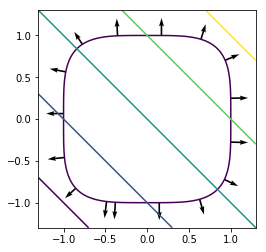

In [8]:
fig = plt.figure()
ax = fig.gca()
pg = ax.contour(X,Y,gn(X,Y),0)
ax.contour(X,Y,fn(X,Y),[-2,-1,0,1,2])
GG = grad_gn(XG,YG)
ax.quiver(XG,YG,GG[0],GG[1],angles='xy',scale=50)
ax.set_aspect('equal')

In [9]:
GLF = grad_f-mu*grad_g

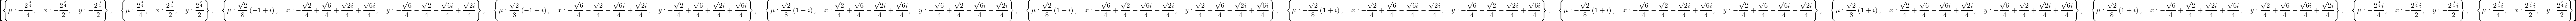

In [10]:
M = solve([GLF,g])
M

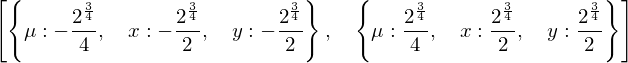

In [11]:
rsol = []
for sol in M:
    if (im(sol[mu])==0) & (im(sol[x])==0) & (im(sol[y])==0):
        rsol.append(sol)
rsol

In [12]:
g.subs(rsol[0])

In [13]:
g.subs(rsol[1])

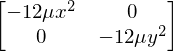

In [14]:
H = Matrix(2,2,[ (f-mu*g).diff(x1,x2) for x1 in [x,y] for x2 in [x,y]])
H

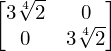

In [15]:
H.subs(rsol[0])

Also haben wir hier ein Minimum (Achtung: Fuer das Minimum muss nur ein Teil der Hessematrix positiv definit sein
-> Optimierung

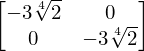

In [16]:
H.subs(rsol[1])

In [17]:
xx=rsol[0][x]
yy=rsol[0][y]

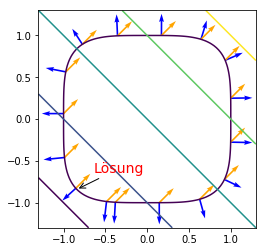

In [18]:
fig = plt.figure()
ax = fig.gca()
pg = ax.contour(X,Y,gn(X,Y),0)
ax.contour(X,Y,fn(X,Y),[-2,-1,0,1,2])
GG = grad_gn(XG,YG)
GF = grad_fn(XG,YG)
ax.quiver(XG,YG,GG[0],GG[1],angles='xy',scale=40,color='blue')
ax.quiver(XG,YG,GF[0],GF[1],angles='xy',scale=15,color='orange')
ax.set_aspect('equal')
ax.annotate('Lösung',(xx,yy),(xx+.2,yy+.2),\
            arrowprops={'arrowstyle':'->'},color='red',fontsize=14)


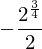

In [19]:
xx